In [1]:
#import librarie
from zipfile import ZipFile 
import os.path
from os import path
import pandas as pd
import numpy as np
import base64
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import groupby
from matplotlib import font_manager



In [2]:
# [f for f in matplotlib.font_manager.fontManager.ttflist]

In [3]:
# fontP = font_manager.FontProperties()
# fontP.set_family('Microsoft YaHei')
# fontP.set_size(14)
# plt.rcParams["font.family"] = "Microsoft YaHei"


# Load Data

In [4]:
#load into data frame
file_name = "corpus_poem.zip"

poems_data = []
with ZipFile(file_name) as z:
    for filename in z.namelist():
        if not os.path.isdir(filename):
            # read the file
            with z.open(filename) as f:
                poem = {}
                for line in f:
                    new_line = line.decode('utf-8').replace("\n","")
                    split_line = new_line.split(":");
                    poem[split_line[0].strip()] = split_line[1].strip()
                poems_data.append(poem)
poems_data = poems_data[1:]
poems_dataframe = pd.DataFrame.from_dict(poems_data)                

# Exploratory Data Analysis (EDA)

In [5]:
poems_dataframe.head()

,dynasty,author,tags,star,author_stars,title,content
0,唐代,杜牧,,1,1692,和野人殷潜之题筹笔驿十四韵,三吴裂婺女，九锡狱孤儿。霸主业未半，本朝心是谁。永安宫受诏，筹笔驿沉思。画地乾坤在，濡毫胜负...
1,清代,纳兰性德,写景;伤春,13,1951,四和香·麦浪翻晴风飐柳,麦浪翻晴风飐柳，已过伤春候。因甚为他成僝僽？毕竟是春迤逗。红药阑边携素手，暖语浓于酒。盼到园...
2,唐代,刘禹锡,,1,2116,奉送浙西李仆射相公赴镇,建节东行是旧游，欢声喜气满吴州。郡人重得黄丞相，童子争迎郭细侯。诏下初辞温室树，梦中先到景阳...
3,唐代,王维,,1,2192,大同殿柱产玉芝，龙池上有庆云神光照殿，百,欲笑周文歌宴镐，遥轻汉武乐横汾。岂知玉殿生三秀，讵有铜池出五云。陌上尧樽倾北斗，楼前舜乐动南...
4,唐代,王维,,2,2192,冬日游览,步出城东门，试骋千里目。青山横苍林，赤日团平陆。渭北走邯郸，关东出函谷。秦地万方会，来朝九州...


In [6]:
poems_dataframe.describe()

,dynasty,author,tags,star,author_stars,title,content
count,92121,92121,92121,92121,92121,92121,92121
unique,15,1236,5129,919,245,83603,85713
top,宋代,陆游,,1,0,句,娟娟月满。冉冉梅花暖。春意初长寒力浅。渐拟芳菲满眼。当时吉梦重重。间生天子三公。付与人间桃李...
freq,53453,3762,85980,73789,5678,225,4


# Clean up Data

## Invalid Characters and Nulls

In [7]:
filtered_poems_dataframe = poems_dataframe[~poems_dataframe['content'].str.contains("□")]
filtered_poems_dataframe = filtered_poems_dataframe[~filtered_poems_dataframe['title'].str.contains("□")]
filtered_poems_dataframe = filtered_poems_dataframe[~filtered_poems_dataframe['author'].str.contains("□")]
filtered_poems_dataframe = filtered_poems_dataframe[~filtered_poems_dataframe['dynasty'].str.contains("□")]

In [8]:
filtered_poems_dataframe.describe()

,dynasty,author,tags,star,author_stars,title,content
count,90923,90923,90923,90923,90923,90923,90923
unique,15,1233,5119,919,245,82538,84649
top,宋代,陆游,,1,0,句,娟娟月满。冉冉梅花暖。春意初长寒力浅。渐拟芳菲满眼。当时吉梦重重。间生天子三公。付与人间桃李...
freq,52563,3761,84794,72729,5563,224,4


In [9]:
filtered_poems_dataframe = filtered_poems_dataframe.dropna()
filtered_poems_dataframe = filtered_poems_dataframe[filtered_poems_dataframe['content'] != '']
filtered_poems_dataframe = filtered_poems_dataframe[filtered_poems_dataframe['author'] != '']
filtered_poems_dataframe = filtered_poems_dataframe[filtered_poems_dataframe['dynasty'] != '']
filtered_poems_dataframe = filtered_poems_dataframe[filtered_poems_dataframe['title'] != '']

filtered_poems_dataframe.describe()

,dynasty,author,tags,star,author_stars,title,content
count,90923,90923,90923,90923,90923,90923,90923
unique,15,1233,5119,919,245,82538,84649
top,宋代,陆游,,1,0,句,娟娟月满。冉冉梅花暖。春意初长寒力浅。渐拟芳菲满眼。当时吉梦重重。间生天子三公。付与人间桃李...
freq,52563,3761,84794,72729,5563,224,4


## Duplication

There are some duplication in contents, we will exame those duplication and remove them if needed.
Also during random examing the data, there are some incomplete poems. 

In [10]:
duplicated_by_content = filtered_poems_dataframe[filtered_poems_dataframe.duplicated(['content'], keep=False)]\
.sort_values(by=['content','star','tags','title'])
duplicated_by_content.head(10)

,dynasty,author,tags,star,author_stars,title,content
90254,宋代,姜夔,,1,279,琵琶仙·《吴都赋》云：「户藏烟浦,《吴都赋》云：“户藏烟浦，家具画船。”唯吴兴为然。春游之盛，西湖未能过也。己酉岁，予与萧时父...
32284,宋代,姜夔,春游;怀人,64,279,琵琶仙·双桨来时,《吴都赋》云：“户藏烟浦，家具画船。”唯吴兴为然。春游之盛，西湖未能过也。己酉岁，予与萧时父...
16737,元代,关汉卿,,1,124,【南吕】一枝花不伏老,〔一枝花〕 攀出墙朵朵花，折临路枝枝柳。花攀红蕊嫩，柳折翠条柔，浪子风流。凭着我折柳攀花手...
52397,元代,关汉卿,散曲;抒情;生活,140,124,一枝花·不伏老,〔一枝花〕 攀出墙朵朵花，折临路枝枝柳。花攀红蕊嫩，柳折翠条柔，浪子风流。凭着我折柳攀花手...
57415,明代,唐寅,,1,231,伯虎扮乞儿，作诗骗酒,一上一上又一上，一上直到高山上。举头红日白云低，四海五湖皆一望。
82334,明代,唐寅,,1,231,登山,一上一上又一上，一上直到高山上。举头红日白云低，四海五湖皆一望。
60427,宋代,汪元量,,1,57,满江红·一个兰舟,一个兰舟，双桂桨、顺流东去。但满目、银光万顷，凄其风露。渔火已归鸿雁汊，棹歌更在鸳鸯浦。渐夜...
76422,宋代,汪元量,,2,57,满江红（吴江秋夜）,一个兰舟，双桂桨、顺流东去。但满目、银光万顷，凄其风露。渔火已归鸿雁汊，棹歌更在鸳鸯浦。渐夜...
18289,唐代,李白,,1,6155,与史中郎钦听黄鹤楼上吹笛,一为迁客去长沙，西望长安不见家。黄鹤楼中吹玉笛，江城五月落梅花。
3971,唐代,李白,贬谪;抒情;思乡;忧国忧民,655,6155,与史郎中钦听黄鹤楼上吹笛题北榭碑,一为迁客去长沙，西望长安不见家。黄鹤楼中吹玉笛，江城五月落梅花。


In [11]:
#define function
agg_f = {
    'dynasty': 'first',
    'author': 'first',
    'tags': lambda x: ';'.join(x),
    'star':['max'], 
    'author_stars':['max'], 
    'title': lambda x: x.loc[x.str.len().idxmax()]}

In [12]:
group_by_content = filtered_poems_dataframe.groupby('content').agg(agg_f).reset_index()

In [13]:
group_by_content.columns = ['content', 'dynasty','author','tags','star','author_stars','title']

In [14]:
# group_by_content['tags_list'] = group_by_content['star']
group_by_content['tags_list'] = group_by_content.apply(lambda row : row.tags.replace(';',' ').strip().split(' '), axis=1)

In [15]:
poems_df = group_by_content[group_by_content['tags'] != '']
poems_df = poems_df[poems_df['tags'] != ';']
poems_df = poems_df[poems_df['tags'] != ';;']
poems_df = poems_df[poems_df['tags'] != ';;;']
poems_df = poems_df[poems_df['tags'] != ';;;;']

In [16]:
poems_df.describe()

,content,dynasty,author,tags,star,author_stars,title,tags_list
count,6119,6119,6119,6119,6119,6119,6119,6119
unique,6119,13,688,5214,911,245,5936,5111
top,多少恨，昨夜梦魂中。还似旧时游上苑，车如流水马如龙。花月正春风。,唐代,李白,写景;抒情,1,6155,采莲曲,"[写景, 抒情]"
freq,1,2626,376,43,198,376,7,49


In [17]:
poems_df.head(10)

,content,dynasty,author,tags,star,author_stars,title,tags_list
38,《吴都赋》云：“户藏烟浦，家具画船。”唯吴兴为然。春游之盛，西湖未能过也。己酉岁，予与萧时父...,宋代,姜夔,春游;怀人;,64,279,琵琶仙·《吴都赋》云：「户藏烟浦,"[春游, 怀人]"
39,《廿一史弹词》第三段说秦汉开场词滚滚长江东逝水，浪花淘尽英雄。是非成败转头空。青山依旧在，几...,明代,杨慎,咏史;抒怀;人生;哲理,3244,131,临江仙·滚滚长江东逝水,"[咏史, 抒怀, 人生, 哲理]"
40,《水经》云：“彭蠡之口有石钟山焉。”郦元以为下临深潭，微风鼓浪，水石相搏，声如洪钟。是说也，...,宋代,苏轼,古文观止;纪游;写景;写山,306,4011,石钟山记,"[古文观止, 纪游, 写景, 写山]"
41,【序】辛亥之冬，予载雪诣石湖。止既月，授简索句，且征新声，作此两曲。石湖把玩不已，使工妓隶习...,宋代,姜夔,咏物;梅花,74,279,暗香疏影,"[咏物, 梅花]"
44,〔一枝花〕 攀出墙朵朵花，折临路枝枝柳。花攀红蕊嫩，柳折翠条柔，浪子风流。凭着我折柳攀花手...,元代,关汉卿,;散曲;抒情;生活,140,124,【南吕】一枝花不伏老,"[散曲, 抒情, 生活]"
54,一上西园避暑亭，芰荷香细午风轻。眼前物物皆佳兴，并作吟窝一味清。,唐代,王贞白,写景;抒情,2,82,白鹿洞二首·其二,"[写景, 抒情]"
56,一上高城万里愁，蒹葭杨柳似汀洲。溪云初起日沉阁，山雨欲来风满楼。(沉通：沈)鸟下绿芜秦苑夕，...,唐代,许浑,写景;吊古伤今,464,663,咸阳城东楼咸阳城西楼晚眺,"[写景, 吊古伤今]"
66,一丘壑。老子风流占却。茅檐上、松月桂云，脉脉石泉逗山脚。寻思前事错。恼杀晨猿夜鹤。终须是、邓...,宋代,辛弃疾,写景;归隐;旷达;淡泊,27,2593,兰陵王·赋一丘一壑,"[写景, 归隐, 旷达, 淡泊]"
68,一丘常欲卧，三径苦无资。北土非吾愿，东林怀我师。黄金燃桂尽，壮志逐年衰。日夕凉风至，闻蝉但益悲。,唐代,孟浩然,唐诗三百首;抒情;归隐,47,1285,秦中感秋寄远上人秦中寄远上人,"[唐诗三百首, 抒情, 归隐]"
81,一个小园儿，两三亩地。花竹随宜旋装缀。槿篱茅舍，便有山家风味。等闲池上饮，林间醉。都为自家，...,宋代,朱敦儒,写景;议论,32,322,感皇恩·一个小园儿,"[写景, 议论]"


## Save to csv

In [19]:
compression_opts = dict(method='zip', archive_name='poems_with_tags.csv') 

poems_df.to_csv('poems_with_tags.zip', index=False,compression=compression_opts)  

## Dynasties Summary

In [225]:
group_by_dynasty = poems_df.groupby('dynasty').describe() 

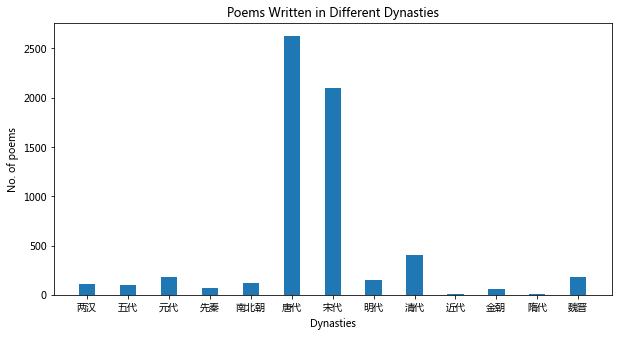

In [226]:
poems_by_dynasty = group_by_dynasty['content', 'unique']
# creating the dataset 
dynasties = list(poems_by_dynasty.index) 
poems_count = list(poems_by_dynasty) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(dynasties, poems_count,  
        width = 0.4) 
  
plt.xlabel("Dynasties") 
plt.ylabel("No. of poems") 
plt.title("Poems Written in Different Dynasties") 
plt.show() 

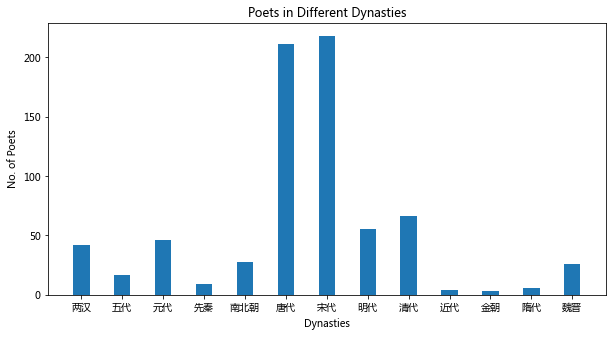

In [227]:
poets_by_dynasty = group_by_dynasty['author', 'unique']
# creating the dataset 
dynasties = list(poets_by_dynasty.index) 
poets_count = list(poets_by_dynasty) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(dynasties, poets_count,  
        width = 0.4) 
  
plt.xlabel("Dynasties") 
plt.ylabel("No. of Poets") 
plt.title("Poets in Different Dynasties") 
plt.show() 

## Poets Summary

In [228]:
group_by_author = poems_df.groupby('author').describe()
group_by_author = group_by_author.sort_values(by=[('title', 'unique')],ascending=False)

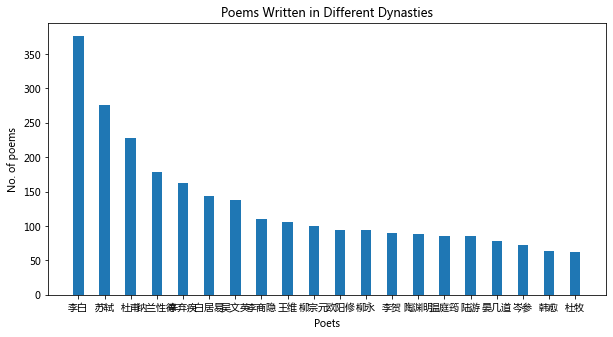

In [229]:
poems_by_author = group_by_author['title', 'unique']
# creating the dataset 
poets = list(poems_by_author.index)[:20] 
poems_count = list(poems_by_author)[:20] 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(poets, poems_count,  
        width = 0.4) 
  
plt.xlabel("Poets") 
plt.ylabel("No. of poems") 
plt.title("Poems Written in Different Dynasties") 
plt.show()

## Tags Summary

In [242]:
flatten_tags= poems_df.explode('tags_list')
group_by_dynasty = flatten_tags.groupby('dynasty').describe()

In [244]:
group_by_dynasty.columns

MultiIndex([(     'content',  'count'),
            (     'content', 'unique'),
            (     'content',    'top'),
            (     'content',   'freq'),
            (      'author',  'count'),
            (      'author', 'unique'),
            (      'author',    'top'),
            (      'author',   'freq'),
            (        'tags',  'count'),
            (        'tags', 'unique'),
            (        'tags',    'top'),
            (        'tags',   'freq'),
            (        'star',  'count'),
            (        'star', 'unique'),
            (        'star',    'top'),
            (        'star',   'freq'),
            ('author_stars',  'count'),
            ('author_stars', 'unique'),
            ('author_stars',    'top'),
            ('author_stars',   'freq'),
            (       'title',  'count'),
            (       'title', 'unique'),
            (       'title',    'top'),
            (       'title',   'freq'),
            (   'tags_list',  'count'),


In [245]:
group_by_dynasty[('tags_list','top')]

dynasty
两汉     古文观止
五代       写景
元代       抒情
先秦     古文观止
南北朝      写景
唐代       写景
宋代       写景
明代       写景
清代       写景
近代       抒怀
金朝       组诗
隋代       秋天
魏晋       抒情
Name: (tags_list, top), dtype: object

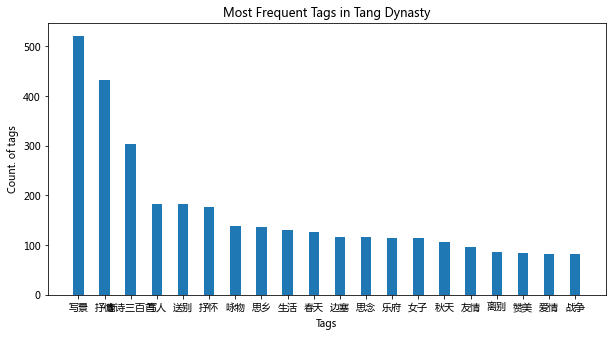

In [252]:
tang_dynasty_tags = flatten_tags[flatten_tags['dynasty']=='唐代'].groupby('tags_list').count()
tang_dynasty_tags = tang_dynasty_tags.sort_values(by=['title'],ascending=False)
# creating the dataset 
tags = list(tang_dynasty_tags.index)[:20] 
tags_count = list(tang_dynasty_tags.title)[:20] 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(tags, tags_count,  
        width = 0.4) 
  
plt.xlabel("Tags") 
plt.ylabel("Count. of tags") 
plt.title("Most Frequent Tags in Tang Dynasty") 
plt.show()

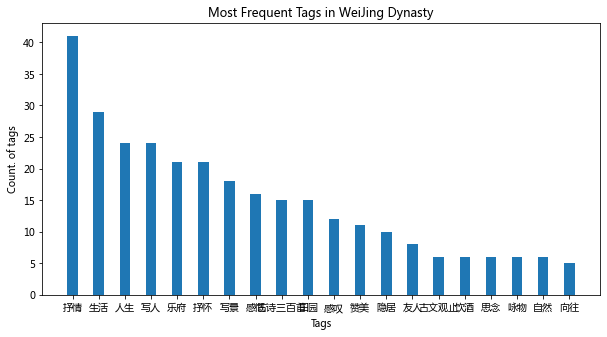

In [253]:
weijin_dynasty_tags = flatten_tags[flatten_tags['dynasty']=='魏晋'].groupby('tags_list').count()
weijin_dynasty_tags = weijin_dynasty_tags.sort_values(by=['title'],ascending=False)
# creating the dataset 
tags = list(weijin_dynasty_tags.index)[:20] 
tags_count = list(weijin_dynasty_tags.title)[:20] 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(tags, tags_count,  
        width = 0.4) 
  
plt.xlabel("Tags") 
plt.ylabel("Count. of tags") 
plt.title("Most Frequent Tags in WeiJing Dynasty") 
plt.show()

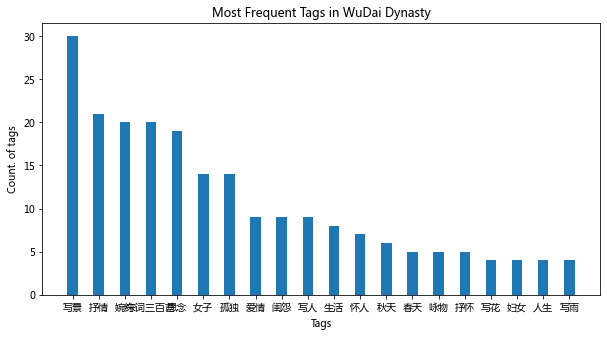

In [254]:
wudai_dynasty_tags = flatten_tags[flatten_tags['dynasty']=='五代'].groupby('tags_list').count()
wudai_dynasty_tags = wudai_dynasty_tags.sort_values(by=['title'],ascending=False)
# creating the dataset 
tags = list(wudai_dynasty_tags.index)[:20] 
tags_count = list(wudai_dynasty_tags.title)[:20] 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(tags, tags_count,  
        width = 0.4) 
  
plt.xlabel("Tags") 
plt.ylabel("Count. of tags") 
plt.title("Most Frequent Tags in WuDai Dynasty") 
plt.show()

## Objects Summary (Most frequent word/two words)